# Exploratory Data Analysis: Credit Card Fraud Detection

In this notebook we will go through the credit card fraud detection dataset. The goal here is to understand the data's structure, identify patterns, and discover insights about fraudulent vs non-fraudulent transactions. This dataset is known for being highly imbalanced, which presents a unique challenge for machine learning models.

First let's import the libraries we're going to use

#### 1. Setup and Data Loading

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [13]:
try:
    data = pd.read_csv("../data/creditcard.csv")
    print(f'Shape of the dataset: {data.shape}')
except FileNotFoundError as e:
    print(f"Error 'creditcard.csv' not found. Please download it from Kaggle and place it in the 'data/' directory")

Shape of the dataset: (284807, 31)


Let's get familiar with this data set. First let's check the first few rows, and take a look at the first five rows

In [10]:
print('First five rows of the dataset:')
data.head()

First five rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 2. Initial Data Inspection

Let's check the columns and data types:

In [12]:
print(f'Dataset Information')
data.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

So the columns 0-29 are float64 while the last column is type int which can be 1 in case of fraud, or 0 otherwise. The columns 0-29 had the original human-readable data scrambled for privacy, using a mathematical process PCA (Principal Component Analysis), in order to transform these original columns into the anonymous V1, V2, ..., V28 columns.

Principal Component Analysis is a technique used to simplify complex data. Its main goal is to reduce the number of variables in a dataset while preserving the important information as much as possible.

A good analogy here is a fruit smoothie. Think of your dataset as a bowl of many different fruits: strawberries, oranges, blueberries, apples, bananas. The goal is to describe the main flavors of the fruit bowl without listing every single fruit. Now PCA kicks in, you put all the fruits in a blender. The result, the Principal Components, are the main flavors you can taste in this smoothie. Let's say the strongest flavor is sweet and tangy, this will be the mix between strawberry and orange. The second flavor is creamy and mild, this is your apple and banana, and so on. This way you preserved the most important information (the taste) but lost the original forms (the original whole fruits)

While we cannot know what the original V columns represented, this new mathematically constructed feature captures some of the information from all the original features.

The only features that have not been transformed are 'Time' and 'Amount'

Let's now check for any missing values

In [14]:
print(data.isnull().sum().max())

0


Let's now check the summary statistics for this dataset.

In [15]:
display(data.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 3. Target Variable Analysis: Class Imbalance

One of the most important aspect of this dataset is the severe class imbalance. Let's check the distribution of the fraudulent or not fraudulent classes.

In [17]:
class_counts = data['Class'].value_counts()
class_percentage = data['Class'].value_counts(normalize=True) * 100
print(f'Non Fraudulent (Class 0): {class_counts[0]}, which represents {class_percentage[0]:.2f}% of whole dataset')
print(f'Fraudulent (Class 1): {class_counts[1]}, which represents {class_percentage[1]:.2f}% of whole dataset')

Non Fraudulent (Class 0): 284315, which represents 99.83% of whole dataset
Fraudulent (Class 1): 492, which represents 0.17% of whole dataset


Fraudulent transaction make up only 0.17% of the total data. This is a very important takeaway, which should strongly consider during modeling, as it can lead to strong biased model that will perform poorly on the minority, fraudulent, class.

Before we move to the next point let's take a look at how this data looks as a class distribution.

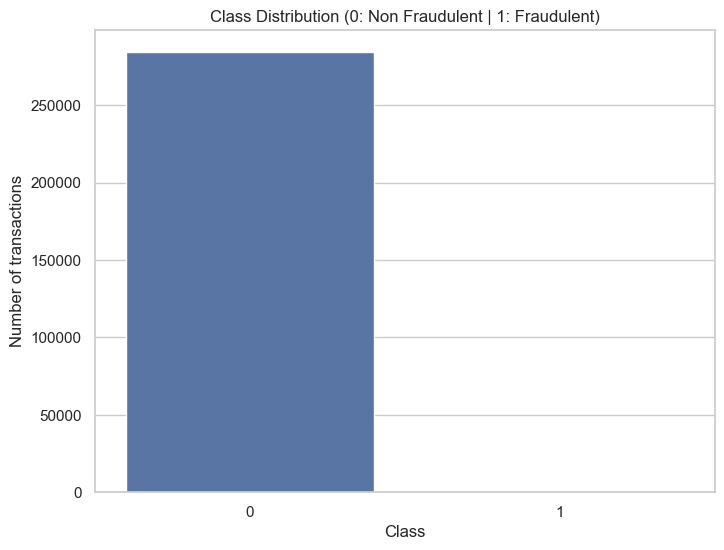

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non Fraudulent | 1: Fraudulent)')
plt.ylabel('Number of transactions')
plt.show()

The dataset is severely imbalanced. This will be the biggest challenge for any model.

#### 4. Analyzing 'Time' and 'Amount' Features

So far we looked at the anonymized features, the V columns. They are a black box, but Time and Amount got away, and are understandable. We can ask ourselves if the fraudulent transactions happen at specific times, or if they involve large or small amounts of money.

Let's create some histograms for Time and Amount.

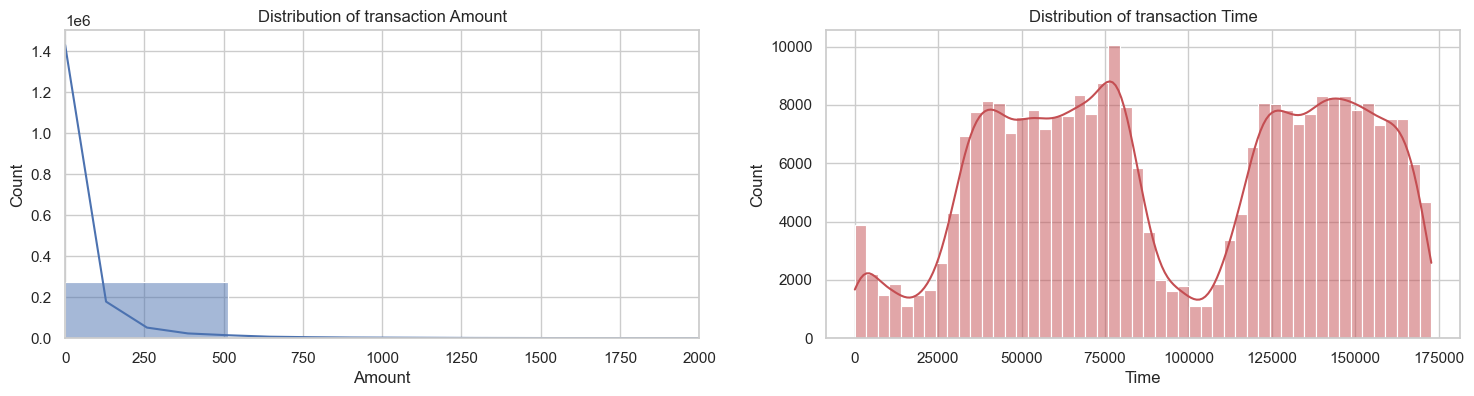

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(data['Amount'], ax=ax[0], color='b', bins=50, kde=True)
ax[0].set_title('Distribution of transaction Amount')
ax[0].set_xlim([0, 2000])

sns.histplot(data['Time'], ax=ax[1], color='r', bins=50, kde=True)
ax[1].set_title('Distribution of transaction Time')
plt.show()

The 'Time' feature seems to show two peaks. As Kaggle described this dataset was collected in two days, the peaks might be correlated with the daytime, while the valleys might correspond to nighttime.

Let's compare the Amount feature for Fraudulent vs Non-Fraudulent Transactions

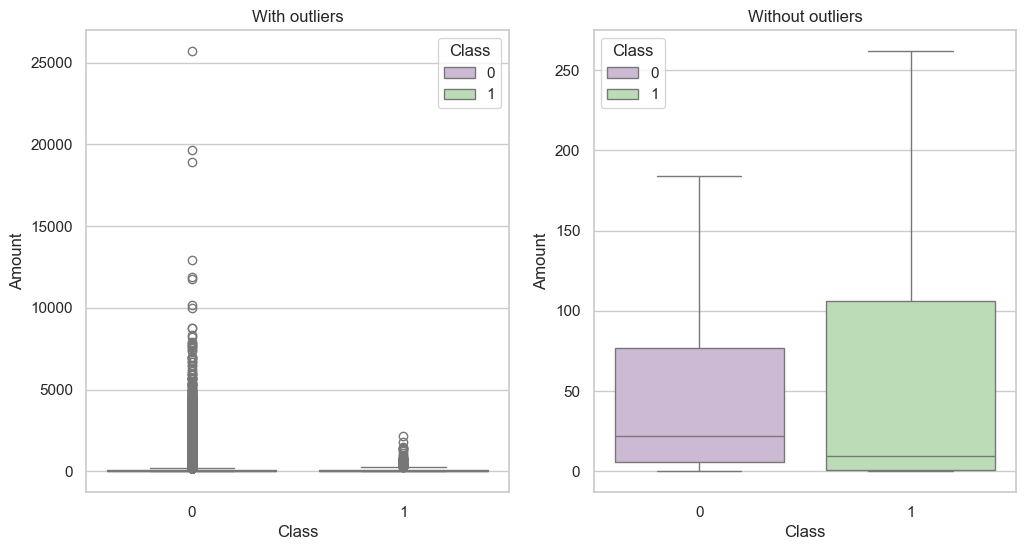

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
s = sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=data, palette="PRGn", showfliers=True)
s2 = sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=data, palette="PRGn", showfliers=False)
ax1.set_title('With outliers')
ax2.set_title('Without outliers')
plt.show()

The first plot shows that the data is heavily right-skewed, particularly in class 0. While a few legitimate transactions, class 0, can be for extremely large amounts, the typical fraudulent transaction, class 1, is for a smaller monetary value. Having the data dominated by extreme outliers makes a direct comparison difficult.

The second plot cleans up the view. It shows that the central tendencies of the two classes are quite different. Class 0 is typical value is low while class 1's is substantially higher and more spread out.

We can conclude that the non-fraudulent, class 0, consists of many small payments, with rare, extremely high-value exceptions. On the other hand the fraudulent, class 1, consists of higher amounts than typical non-fraudulent transactions. However, the median for fraudulent transactions is lower than the normal transactions. Fraudsters might prefer smaller amounts to stay under the radar.

#### 5. Uncover Relationships - Correlation Analysis

Now if we move to the PCA features, as we cannot interpret them directly, maybe we can see which ones are strongly related to fraud. A correlation matrix can show here which features have the strongest positive or negative relationship with the 'Class' column. Since the V features are PCA components, we expect them to be largely uncorrelated, but we can see how they correlate with target class, and also with the unanonymized features Amount and Time

First let's create the correlation matrix with the Class variable

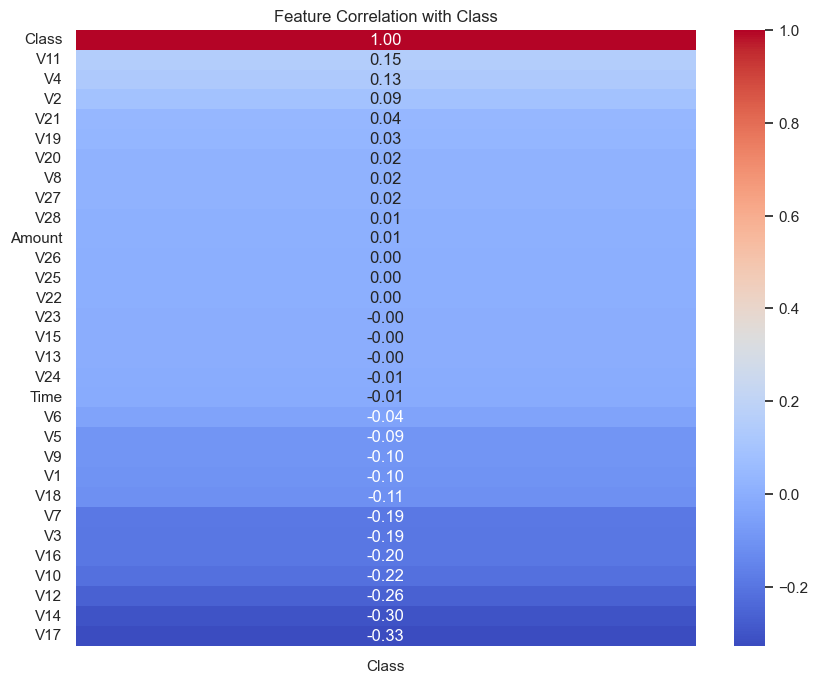

In [26]:
corr = data.corr()
class_corr = corr[['Class']].sort_values(by='Class', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(class_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Class')
plt.show()

A few observations can be made here. First, V17, V14, V12, V10 have the strongest negative correlation with Class. On the other hand V11, V4, V2 have the strongest positive correlations with Class. Amount and Time features have very weak correlations with Class.

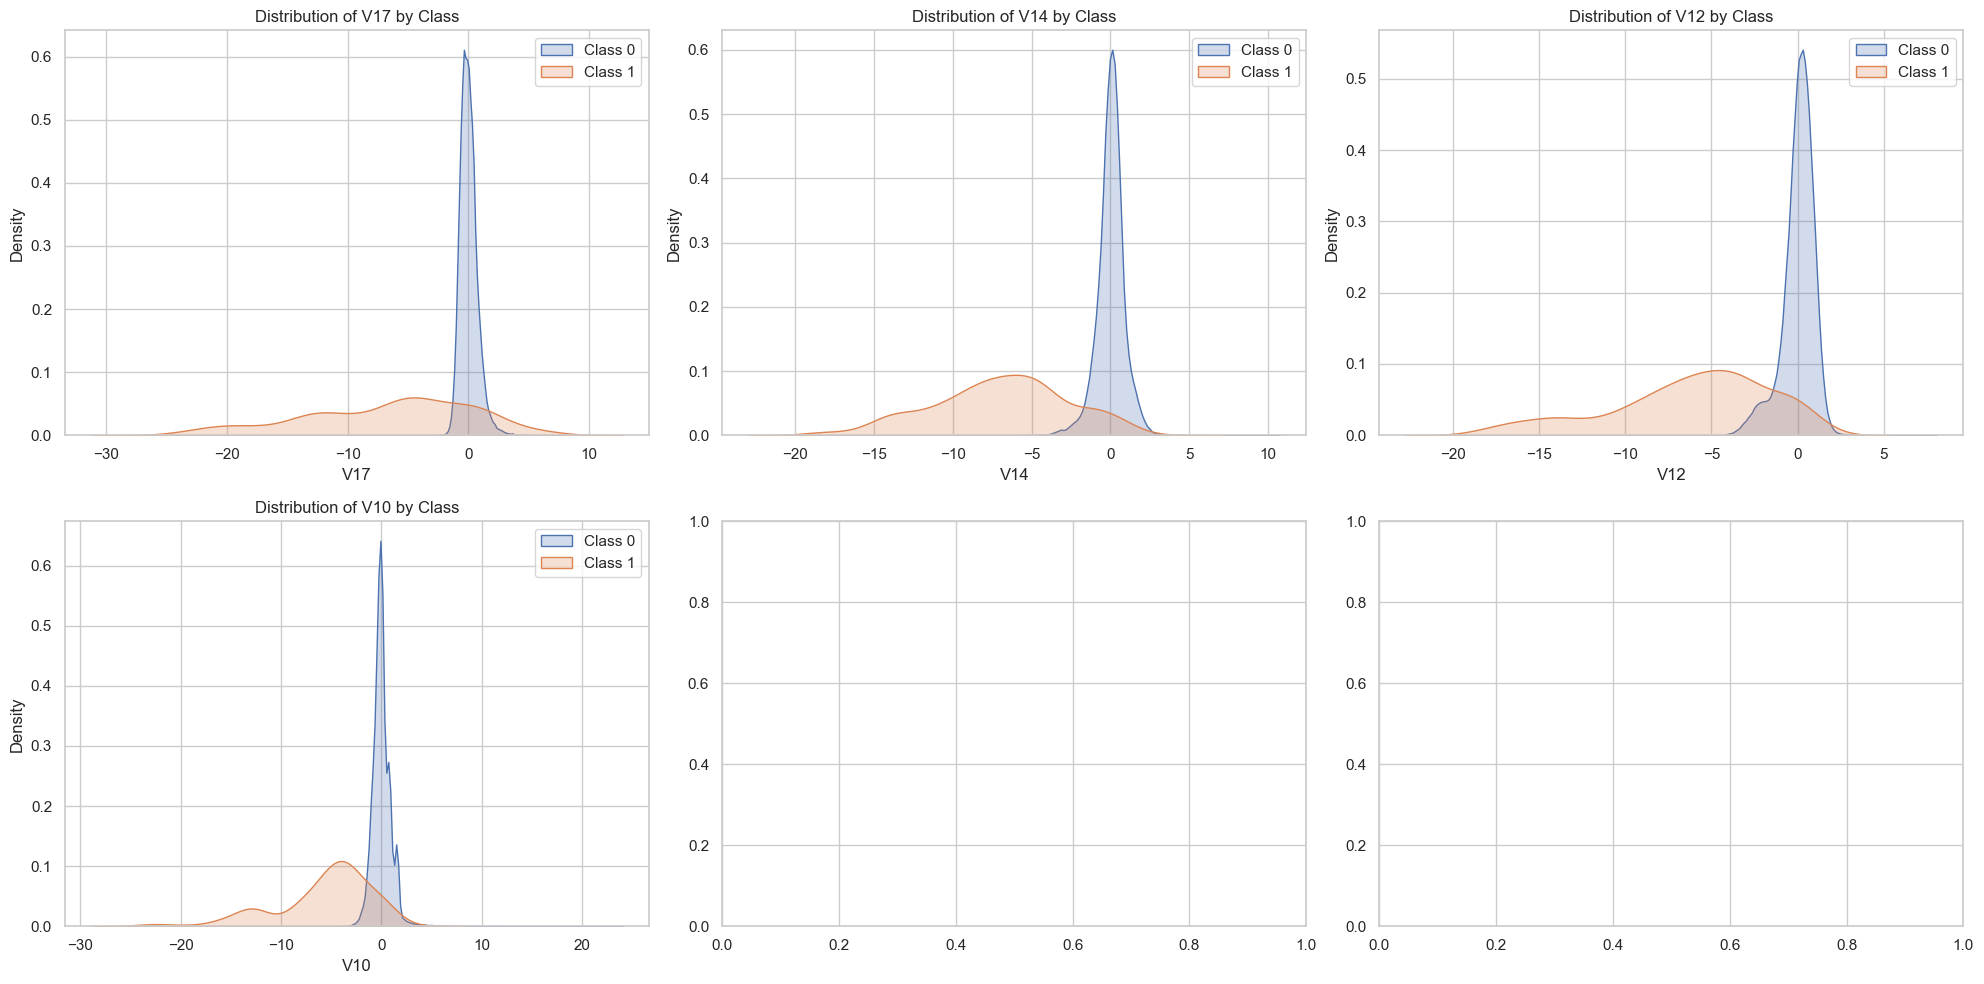

In [28]:
top_features = ['V17', 'V14', 'V12', 'V10']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, feature in enumerate(top_features):
    row = i // 3
    col = i % 3
    sns.kdeplot(data[data['Class']==0][feature], ax=axes[row, col], label='Class 0', fill=True)
    sns.kdeplot(data[data['Class']==1][feature], ax=axes[row, col], label='Class 1', fill=True)
    axes[row, col].set_title(f'Distribution of {feature} by Class')
    axes[row, col].legend()

plt.tight_layout()
plt.show()



The above density plots clearly show that for these highly correlated features, the distributions for fraudulent and non-fraudulent transactions are distinctly different. This is a good thing, as it means that these features will be very useful for a machine learning model to distinguish between the two classes.

#### 7. Conclusions

Based on the EDA analysis we can state the following things:

1. **Extreme class Imbalance:** The dataset is heavily skewed towards non-fraudulent transactions. This requires special handling during model training, such as using appropriate evaluation metrics like Area Under the Precision-Recall Curve (AUPRC).
2. **Feature Scaling:** The 'Amount' and 'Time' are on a completely different scale from the V features. Using a StandardScaler before fedding them into the model, seems like a good idea
3. **Informative Features:** Several of the PCA-transformed features (V17, V14, V12, V10) may be an indicative of fraud and will be helpful for building a predictive model
4. **Transaction Behavior:** Fraudulent transactions tend to involve smaller amounts

The next step, as implemented in this repo, is to train classification models like XGBoost and LightGBM, keeping the class imbalance and feature scaling in mind

References:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data